## Practica 1 Unidad 2

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 1

In [2]:
corpus = [
    "el perro ladra fuerte",
    "el gato maulla suave",
    "el perro y el gato juegan",
    "el pájaro canta bonito",
    "el caballo corre rápido",
    "la vaca muge despacio",
    "el pez nada tranquilo",
    "la abeja zumba cerca",
    "el ratón corre pequeño",
    "el gallo canta temprano",
    "el lobo aúlla de noche",
    "la rana salta alto",
    "el león ruge fuerte",
    "la oveja bala bajito",
    "el pato nada contento",
    "el burro rebuzna fuerte",
    "el tigre acecha sigiloso",
    "la tortuga camina lento",
    "el mono grita alegre",
    "el perro duerme tranquilo"
]

def crear_one_hot_manual(corpus):
    """
    TODO: Implementar One-Hot Encoding sin usar sklearn
    1. Crear vocabulario único
    2. Asignar índice a cada palabra
    3. Crear matriz one-hot para cada documento
    4. Retornar matriz y vocabulario
    """
    vocabulario=set()

    for documento in corpus:
        palabra=documento.split()
        vocabulario.update(palabra)

    vocabulario=sorted(list(vocabulario))
    indices_palabras={}

    for i, palabra in enumerate(vocabulario):
        indices_palabras[palabra]=i

    num_documentos = len(corpus)
    num_palabras = len(vocabulario)
    matriz_onehot = np.zeros((num_documentos, num_palabras), dtype=int)

    for i, documento in enumerate(corpus): # Tenemos la cantidad de frases para la cantidad filas
        palabras = documento.split() # Creamos una lista de palabras por frase
        for palabra in palabras:
            indice = indices_palabras[palabra] # Por cada palabra le vamos a dar un indice
            matriz_onehot[i, indice] = 1 # Aca lo que hacemos es en la matriz le vamos a poner un uno en la fila y columna de cada combinacion de frase Palabra

    return matriz_onehot, vocabulario

matriz, vocab = crear_one_hot_manual(corpus)


### Vocabulario con indices

In [3]:
print("VOCABULARIO CON ÍNDICES:")
print("-" * 30)
for i, palabra in enumerate(vocab):
    print(f"{i:2d}: {palabra}")

print(f"\nTamaño del vocabulario: {len(vocab)} palabras")
print(f"Número de documentos: {len(corpus)}")
print(f"Forma de la matriz: {matriz.shape}")

VOCABULARIO CON ÍNDICES:
------------------------------
 0: abeja
 1: acecha
 2: alegre
 3: alto
 4: aúlla
 5: bajito
 6: bala
 7: bonito
 8: burro
 9: caballo
10: camina
11: canta
12: cerca
13: contento
14: corre
15: de
16: despacio
17: duerme
18: el
19: fuerte
20: gallo
21: gato
22: grita
23: juegan
24: la
25: ladra
26: lento
27: león
28: lobo
29: maulla
30: mono
31: muge
32: nada
33: noche
34: oveja
35: pato
36: pequeño
37: perro
38: pez
39: pájaro
40: rana
41: ratón
42: rebuzna
43: ruge
44: rápido
45: salta
46: sigiloso
47: suave
48: temprano
49: tigre
50: tortuga
51: tranquilo
52: vaca
53: y
54: zumba

Tamaño del vocabulario: 55 palabras
Número de documentos: 20
Forma de la matriz: (20, 55)


### Matriz completa

In [4]:
print("\nPRIMEROS 5 DOCUMENTOS (One-Hot):")
print("-" * 50)
for i in range(5):
    print(f"Doc {i}: {corpus[i]}")
    print(f"Vector: {matriz[i]}")
    print()


PRIMEROS 5 DOCUMENTOS (One-Hot):
--------------------------------------------------
Doc 0: el perro ladra fuerte
Vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Doc 1: el gato maulla suave
Vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

Doc 2: el perro y el gato juegan
Vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]

Doc 3: el pájaro canta bonito
Vector: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Doc 4: el caballo corre rápido
Vector: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]



### Heatmap

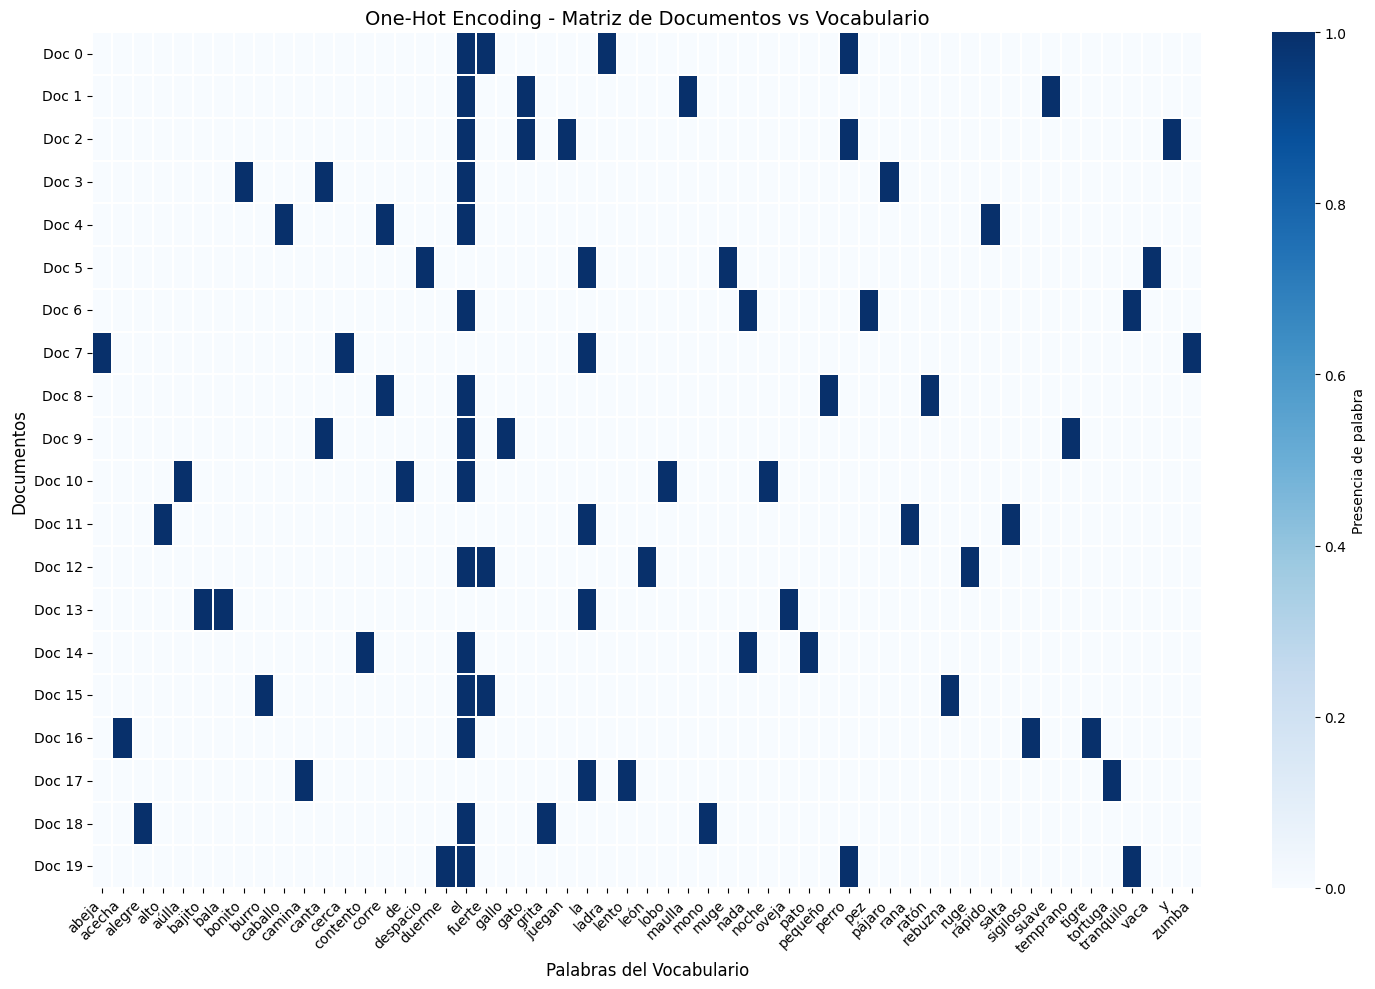

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(matriz,
            xticklabels=vocab,
            yticklabels=[f"Doc {i}" for i in range(len(corpus))],
            cmap='Blues',
            cbar_kws={'label': 'Presencia de palabra'},
            linewidths=0.1)

plt.title('One-Hot Encoding - Matriz de Documentos vs Vocabulario', fontsize=14)
plt.xlabel('Palabras del Vocabulario', fontsize=12)
plt.ylabel('Documentos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ejercicio 2

### Librerias extras

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import time

In [7]:
documentos = [
    "inteligencia artificial revoluciona la tecnología",
    "aprendizaje automático es parte de inteligencia artificial",
    "redes neuronales profundas dominan el aprendizaje",
    "el futuro es inteligencia artificial y robótica",
    "los algoritmos de machine learning analizan grandes datos",
    "procesamiento de lenguaje natural entiende textos humanos",
    "visión por computadora detecta objetos en imágenes",
    "la robótica combina hardware y algoritmos inteligentes",
    "modelos generativos crean contenido nuevo",
    "el big data alimenta a la inteligencia artificial",
    "la automatización transforma la industria moderna",
    "la ética en inteligencia artificial es fundamental",
    "los sistemas expertos ayudan a tomar decisiones",
    "el aprendizaje profundo impulsa los autos autónomos",
    "las redes convolucionales procesan imágenes",
    "las redes recurrentes analizan secuencias temporales",
    "la computación en la nube acelera la inteligencia artificial",
    "el internet de las cosas conecta dispositivos inteligentes",
    "la inteligencia artificial mejora la medicina",
    "los asistentes virtuales usan procesamiento de lenguaje natural"
]

def comparar_implementaciones(documentos):
    """
    TODO: Comparar tu implementación vs sklearn
    1. Implementar con tu función manual
    2. Implementar con OneHotEncoder de sklearn
    3. Verificar que las matrices sean iguales
    4. Medir tiempos
    """
    start_time = time.time()
    matriz_manual, vocabulario = crear_one_hot_manual(documentos)
    tiempo_manual = time.time() - start_time


    start_time = time.time()
    vectorizer = CountVectorizer(binary=True)
    matriz_onehot = vectorizer.fit_transform(documentos)
    vocabulario_aut = vectorizer.get_feature_names_out()
    tiempo_manual = time.time() - start_time



# Generar reporte con:
# - Tabla comparativa de tiempos